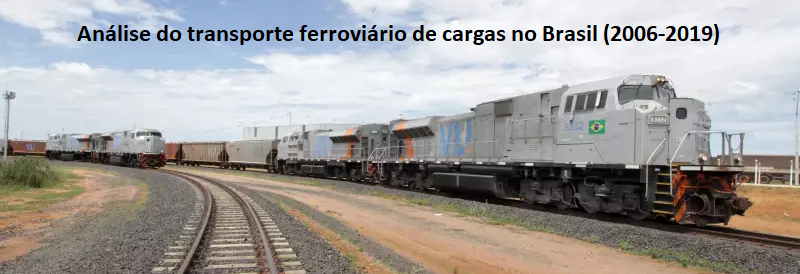

In [21]:
from IPython.core.display import Image, display
display(Image('banner-ferrovias.png', width=800))

### Breve histórico das ferrovias no Brasil.

Máximo de 2 parágrafos

### Novas tendências para o modal ferroviário.

Máximo de 2 parágrafos

### Objetivos deste projeto.

1 parágrafo

### A malha ferroviária atual.

In [14]:
display(Image('mapa__subsistema_ferroviario_federal_a0.png', height=500, width=1000, unconfined=True))

### Dados utilizados

1 parágrafo

In [1]:
# Acessando o Banco de Dados com Python
import sqlite3

con = sqlite3.connect('ferrovia.db')

cur = con.cursor()
con.commit()

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Lendo a tabela do banco de dados como um Data Frame
dados = pd.read_sql_query('SELECT * FROM CARGAS',con)

dados.head(10)

Ferrovia                        Mercadoria_ANTT  \
0      EFC                                 Álcool   
1      EFC                   Bebidas e Vasilhames   
2      EFC                                  Cobre   
3      EFC                             Ferro Gusa   
4      EFC                             Ferro Gusa   
5      EFC                             Ferro Gusa   
6      EFC                               Gasolina   
7      EFC                               Gasolina   
8      EFC                               Manganês   
9      EFC  Máquinas, Motores, Peças e acessórios   

                  Estacao_Origem UF_Origem                Estacao_Destino  \
0        Itaqui Base Combustível        MA                         Marabá   
1  Ponta da Madeira Pêra do Píer        MA                     Imperatriz   
2                     Paraupebas        PA         Ponta da Madeira Cobre   
3                     Açailândia        MA  Ponta da Madeira Pêra do Píer   
4                         Marabá        PA  Ponta da Madeira Pêra do Píer   
5                     Santa Inês        MA  Ponta da Madeira Pêra do Píer   
6        Itaqui Base Combustível        MA                     Açailândia   
7        Itaqui Base Combustível        MA                         Marabá   
8                        Carajás        PA      Virador de Vagões Minério   
9  Ponta da Madeira Pêra do Píer        MA                        Carajás   

  UF_Destino      TU        TKU Mes   Ano  
0         PA     184     136344  01  2006  
1         MA    1636     999596  01  2006  
2         MA   24461   21158765  01  2006  
3         MA  116272   60345168  01  2006  
4         MA  205242  152700048  01  2006  
5         MA    8000    1752000  01  2006  
6         MA    5993    3092388  01  2006  
7         PA    2559    1896219  01  2006  
8         MA  107414   95813288  01  2006  
9         PA      38      34124  01  2006

In [4]:
con.close()

### 1) Evolução da tonelada transportada por ano.

In [13]:
ton_ano = pd.Series(dados.groupby('Ano')['TU'].sum(),name='Toneladas-ano')

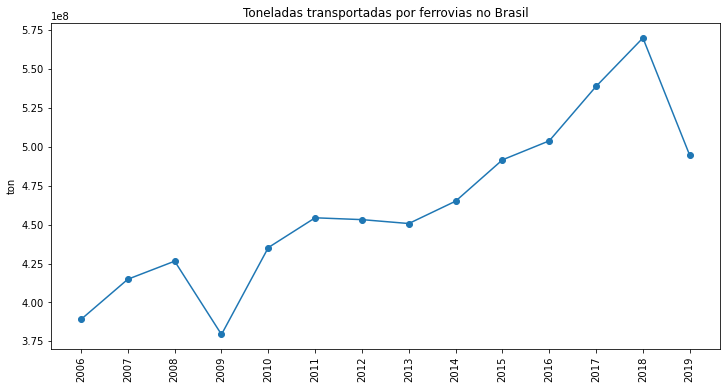

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ton_ano,'-o', label='teste')
plt.ylabel('ton')
plt.xlabel('')
plt.xticks(rotation='vertical')
plt.title('Toneladas transportadas por ferrovias no Brasil')
plt.show()

  O transporte de cargas por ferrovias teve forte crescimento entre 2010 e 2018. No entanto, no último ano, o volume transportado apresentou forte queda retornando a níveis inferiores ao ano de 2016.

### 2) Tonelada transportada por UF de origem.

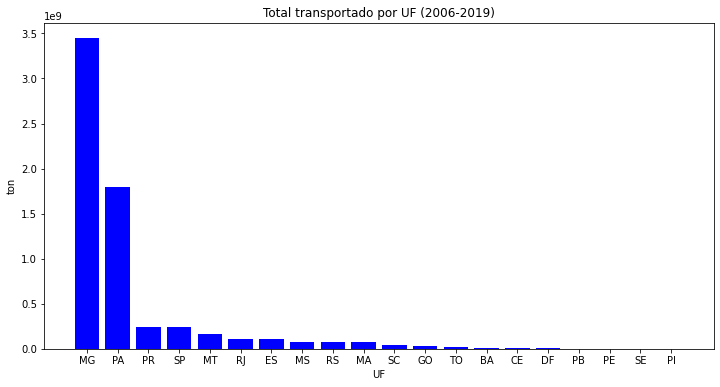

In [15]:
uf_total = dados.groupby(['UF_Origem'])['TU'].agg('sum').sort_values(ascending=False)
uf_siglas = uf_total.index

plt.figure(figsize=(12,6))
plt.bar(uf_siglas,uf_total,color="b")
plt.title('Total transportado por UF (2006-2019)')
plt.xlabel('UF')
plt.ylabel('ton')
plt.show()

A maioria das cargas transportadas por ferrovias concentraram-se nos estados de Minas Gerais e Pará.

#### Em termos percentuais:

In [16]:
pct_UF = (uf_total / uf_total.sum())*100
pct_UF

UF_Origem
MG    53.308863
PA    27.705461
PR     3.816118
SP     3.699882
MT     2.613552
RJ     1.730683
ES     1.689831
MS     1.180488
RS     1.178693
MA     1.155280
SC     0.698658
GO     0.405883
TO     0.374441
BA     0.194425
CE     0.162467
DF     0.070385
PB     0.009785
PE     0.003662
SE     0.001234
PI     0.000209
Name: TU, dtype: float64

As cargas transportadas com origem em Minas Gerais e Pará correspondem a cerca de 90% 
de todo o volume transportado no período entre 2006 e 2019.

### 3) Quantidade transportada por mercadoria.

In [17]:
mercadoria_ano = dados.groupby(['Mercadoria_ANTT'])['TU'].agg('sum').sort_values(ascending=False)

mercadoria_ano = pd.DataFrame(mercadoria_ano)
mercadoria_ano['Percentual'] = (mercadoria_ano / mercadoria_ano.sum())*100

O gráfico a seguir apresenta as 10 mercadorias com maior volume transportado entre 2006 e 2019.

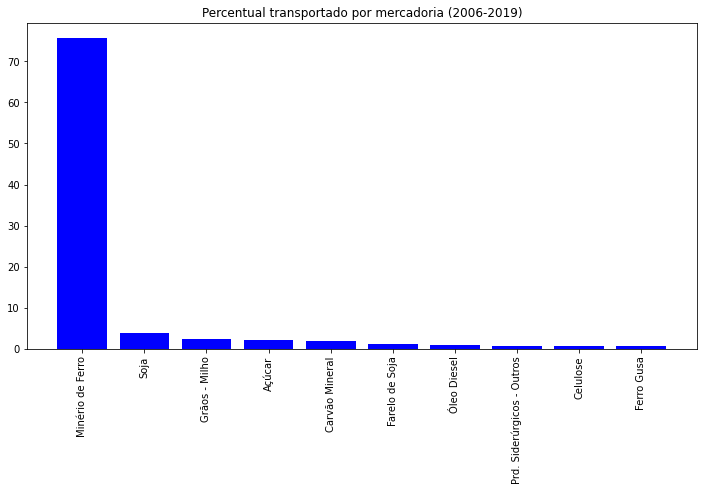

In [18]:
nomes_mercadorias = mercadoria_ano.index[0:10]

plt.figure(figsize=(12,6))
plt.bar(nomes_mercadorias,mercadoria_ano.Percentual[0:10],color="b")
plt.title('Percentual transportado por mercadoria (2006-2019)')
plt.xlabel('')
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

#### Em termos percentuais:

In [19]:
mercadoria_ano.Percentual[0:10]

Mercadoria_ANTT
Minério de Ferro              75.557473
Soja                           3.973224
Grãos - Milho                  2.374145
Açúcar                         2.124744
Carvão Mineral                 2.040684
Farelo de Soja                 1.288272
Óleo Diesel                    1.046317
Prd. Siderúrgicos - Outros     0.802155
Celulose                       0.793718
Ferro Gusa                     0.787085
Name: Percentual, dtype: float64

Mais de 90% do transporte de cargas através do modal ferroviário abrangeu 10 mercadorias entre 2006 e 2019. O tripé Minério de Ferro-Soja-Milho foi responsável por aproximadamente 80% do volume transportado no Brasil.

## 4) Evolução do volume transportado para as principais mercadorias.

In [26]:
mercadorias_serie = dados.groupby(['Mercadoria_ANTT','Ano'])['TU'].agg('sum')

anos = pd_date_range(start='2006',end='2019',freq='Y')
mercadorias_nomes




#fig, ax = plt.subplots(nrows=5, ncols=2)
#for mercadorias_nomes in :
#    for col in row:
#        col.plot(mercadorias_serie[], y)

#plt.show()

TypeError: object of type 'type' has no len()

In [28]:
type(mercadorias_serie)

pandas.core.series.Series

## 5) Sazonalidade no transporte das mercadorias.